
# Project: Investigating Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The dataset is from The Movie Database (TMDb) which is a collection of information from about 10,000 movies. Information includes, title, cast, director, user ratings, revenue, budget, genre, release date, etc. The investigation will explore revenue and how they are affected by genres, popularity, ratings, etc. 

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [16]:
# intial formatting of the data before we read the file in
# helps reduce clutter and noise when displaying numbers
pd.set_option('float_format', '{:.02f}'.format)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#read-in the dataset
df_movie = pd.read_csv('tmdb_movies.csv')
df_movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
# identify datatypes for variables
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

* This shows the datatypes and counts of entries per column.
* There is a significant lack of data in the "homepage," "tagline," "keywords," and "production_companies," which those columns could probably be tossed out. 

In [17]:
# stats for numeric data
df_movie.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.00,3855.00,3855.00,3855.00,3855.00,3855.00,3855.00
mean,1.19,109.22,527.61,6.17,2001.26,44236299.18,137029386.10
std,1.48,19.92,879.87,0.80,11.28,44804027.33,216094430.04
min,0.00,15.00,10.00,2.20,1960.00,0.97,2.37
25%,0.46,95.00,71.00,5.70,1995.00,13090528.47,18341233.68
50%,0.80,106.00,204.00,6.20,2004.00,30015580.40,61718613.20
75%,1.37,119.00,580.00,6.70,2010.00,60613069.68,163240089.70
max,32.99,338.00,9767.00,8.40,2015.00,425000000.00,2827123750.00


> * So initially we see the counts for each of the numerical data has the same which is 10866 so there isn't any missing data for those columns. 
* The minimum for budget, revenue, budget_adj, and revenue_adj is 0 which would probably indicate the data maybe was not available considering I don't think a movie could be made without funds or would not have garnered any revenue. These will be investigated.
* The minimum for runtime is 0 as well which probably indicates an issue in data because movies have to have a runtime to exist. 
* The vote_average is logical because the scale is from 1-10 and the minimum and maximum are within those ranges with the mean being 5.975922 which is mostly centered. 
* The earliest release year is 1960 and latest is 2015 which is around when the dataset was created so that follows logic, with the mean release year being 2001. 
* The popularity rating seems skewed because the maximum is 32.985763 but the mean is 0.646441, so this will need further investigation. 



### Data Cleaning 

In [5]:
#dropped unnecessary columns
df_movie.drop(['homepage','imdb_id','tagline','keywords','overview', 'production_companies',
               'release_date', 'budget','revenue','cast', 'id'], axis=1, inplace=True)

In [6]:
df_movie.head()

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,Furious 7,James Wan,137,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09


* Got rid of the following columns: homepage, imdb_id, tagline, keywords, overview, production_companies, release_date, budget, revenue, cast
* These lacked data in most rows and didnt seem relevant to the information trying to be obtained.
* Also we have the release year so release date was tossed out and the adjusted revenue and budget based on inflation is included so the original values were not deemed useful for analysis.

In [7]:
#query to fing movies with 0 minute runtimes
df_movie.query('runtime == 0')['original_title']

92           Mythica: The Necromancer
334                           Ronaldo
410                    Anarchy Parlor
445     The Exorcism of Molly Hartley
486                If There Be Thorns
595                         Deep Dark
616                      The Outfield
1241                        Dance-Off
1289                        Treehouse
1293                         Tim Maia
1849                     Spectacular!
2315             Listen to Your Heart
2370                  Freshman Father
3329         Grande, grosso e Verdone
3794             Toi, moi, les autres
3857                         Cell 213
3884                           eCupid
4063           Madea's Family Reunion
4138               A Time for Dancing
4829                             Rags
4944              How to Fall in Love
5216            Madea's Class Reunion
5695                 Skinwalker Ranch
5920           The Food Guide to Love
5938                      Go Goa Gone
5992                 Amiche da morire
6040        

> * Some of the titles are recognizable and because this is a userbased website where users contribute the data for these films, that is most likely the reason for 0 input for some of these titles. I could google search each runtime and enter it in manually but since it is such a small portion I'm going to just eliminate these rows most likely. 

In [20]:
#query for $0 budget movies
df_movie.query('budget_adj == 0')['original_title'].count()

0

* A query for budget_adj equaling 0 was ran in order to see how many movies lacked budget info. Since this is a user-contributed site, that is most likely the reason for the lack of data and there are 5696 missing rows which would be impossible to fill manually. Also since a movie has to be funded somehow there is no point in analyzing a "free" movie. 

In [11]:
#query rows with $0 for budget and revenue
df_movie3 = df_movie.query('revenue_adj != 0').query('budget_adj != 0')
df_movie3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 10 columns):
popularity        3855 non-null float64
original_title    3855 non-null object
director          3854 non-null object
runtime           3855 non-null int64
genres            3855 non-null object
vote_count        3855 non-null int64
vote_average      3855 non-null float64
release_year      3855 non-null int64
budget_adj        3855 non-null float64
revenue_adj       3855 non-null float64
dtypes: float64(4), int64(3), object(3)
memory usage: 331.3+ KB


In [18]:
#query rows with $0 for budget and revenue
zero_fund = df_movie[(df_movie.revenue_adj == 0) | (df_movie.budget_adj == 0)]
zero_fund

,popularity,original_title,director,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj


* removed rows where adjusted budget and revenue was 0 because it was missing data which would skew the results

In [12]:
#indexed the rows to be removed
zero_fund_index = zero_fund.index

In [13]:
#dropped $0 rows
df_movie.drop(index = zero_fund_index, inplace = True)

In [14]:
#reset the index
df_movie.reset_index(inplace = True, drop = True)

In [19]:
df_movie.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.00,3855.00,3855.00,3855.00,3855.00,3855.00,3855.00
mean,1.19,109.22,527.61,6.17,2001.26,44236299.18,137029386.10
std,1.48,19.92,879.87,0.80,11.28,44804027.33,216094430.04
min,0.00,15.00,10.00,2.20,1960.00,0.97,2.37
25%,0.46,95.00,71.00,5.70,1995.00,13090528.47,18341233.68
50%,0.80,106.00,204.00,6.20,2004.00,30015580.40,61718613.20
75%,1.37,119.00,580.00,6.70,2010.00,60613069.68,163240089.70
max,32.99,338.00,9767.00,8.40,2015.00,425000000.00,2827123750.00


In [23]:
#split genres for movies
df_movie['genres_2'] = df_movie['genres'].str.split('|').str[0]
df_movie['genres_2'].head()

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: genres_2, dtype: object

* Wanted to drop the multiple genres for films and choose the first one as the official genre for the movie, so a new column 'genres_2' was created

In [24]:
#dropped genres column
df_movie.drop(['genres'], axis=1, inplace=True)

* Dropped the original genres because it was unnecessary for the analysis.

In [25]:
df_movie.genres_2.value_counts()

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              172
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres_2, dtype: int64

* a more concise and workable categories for genres found and since there was only one type found under TV Movie, the row will be dropped

In [27]:
#queried tv movie
tv_movie = df_movie.query("genres_2 == 'TV Movie'")
tv_movie

,popularity,original_title,director,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_2
3085,0.27,Doctor Who,Geoffrey Sax,89,35,5.60,1996,6951083.70,58389103.04,TV Movie


In [28]:
# index tv movie
tv_movie_index = tv_movie.index

In [29]:
#dropped tv movie
df_movie.drop(index = tv_movie_index, inplace = True)

In [30]:
# reset the index
df_movie.reset_index(inplace = True, drop = True)

In [34]:
#found quartile ranges for vote_average
df_movie.vote_average.describe()

count   3854.00
mean       6.17
std        0.80
min        2.20
25%        5.70
50%        6.20
75%        6.70
max        8.40
Name: vote_average, dtype: float64

In [35]:
# found quartile ranges for popularity
df_movie3.popularity.describe()

count   3855.00
mean       1.19
std        1.48
min        0.00
25%        0.46
50%        0.80
75%        1.37
max       32.99
Name: popularity, dtype: float64

In [36]:
# created bin edges for both variables
be_votes = [2.2, 5.7, 6.2, 6.7, 8.4]
be_pop = [0.001117, 0.463068, 0.797723, 1.368403, 32.985763]

In [37]:
#created names for bins
bin_names_votes = ['Low', 'Below Average', 'Above Average', 'High']
bin_names_pop = ['Non Popular', 'Semi Popular', 'Popular', 'Very Popular']

In [42]:
#created new variables with feature engineering 
df_movie['rating_level'] = pd.cut(df_movie['vote_average'], be_votes, labels=bin_names_votes)
df_movie['pop_level'] = pd.cut(df_movie['popularity'], be_pop, labels=bin_names_pop)

In [43]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3854 entries, 0 to 3853
Data columns (total 12 columns):
popularity        3854 non-null float64
original_title    3854 non-null object
director          3853 non-null object
runtime           3854 non-null int64
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
genres_2          3854 non-null object
rating_level      3853 non-null category
pop_level         3853 non-null category
dtypes: category(2), float64(4), int64(3), object(3)
memory usage: 309.1+ KB


In [51]:
df_movie["pop_level"] = df_movie["pop_level"].astype('object')
df_movie["rating_level"] = df_movie["rating_level"].astype('object')

* Changed new columns from type category to objects for easier use with labels on graphs for later. 

In [ ]:
df_movie.info()

In [44]:
#found number of missing values
df_movie.isnull().sum()

popularity        0
original_title    0
director          1
runtime           0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
genres_2          0
rating_level      1
pop_level         1
dtype: int64

In [45]:
# dropped rows with missing values
df_movie.dropna(axis=0, inplace=True)

In [46]:
df_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3851 entries, 0 to 3853
Data columns (total 12 columns):
popularity        3851 non-null float64
original_title    3851 non-null object
director          3851 non-null object
runtime           3851 non-null int64
vote_count        3851 non-null int64
vote_average      3851 non-null float64
release_year      3851 non-null int64
budget_adj        3851 non-null float64
revenue_adj       3851 non-null float64
genres_2          3851 non-null object
rating_level      3851 non-null category
pop_level         3851 non-null category
dtypes: category(2), float64(4), int64(3), object(3)
memory usage: 338.8+ KB


* Found one NaN value in director column, one in the rating_level column, and one in the pop_level column. So these were removed and 3851 samples remain. 

In [59]:
#saved cleaned version of data for future analysis
df_movie.to_csv('movie_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis



### Is the popularity of the movie associated with higher revenues?

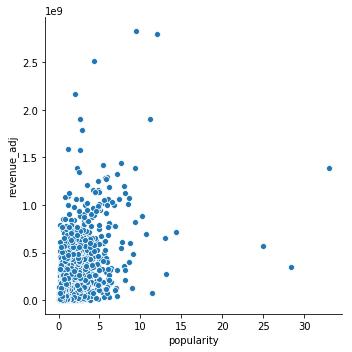

In [47]:
sns.relplot(x="popularity", y="revenue_adj", data=df_movie);

* A simple scatter plot can show a positive correlation between level of popularity and revenue.
* A more appealing approach would be to categorize the levels of popularity based on the quartile levels of popularity. 
* Then a pie chart could visually see the variance in total revenue based on popularity. 

In [48]:
tot_rev = df_movie.groupby('pop_level')['revenue_adj'].sum()
tot_rev

pop_level
Non Popular     38570728005.67
Semi Popular    67016131184.17
Popular        119790795154.33
Very Popular   302796971378.84
Name: revenue_adj, dtype: float64

In [52]:
level_pops = df_movie.pop_level.unique()
level_pops.sort()

In [53]:
def pie_chart():
    sns.set(context="notebook")
    plt.pie(tot_rev, labels=level_pops, autopct='%1.1f%%')
    plt.legend(title="Popularity",
              loc="center right",
              bbox_to_anchor=(1.5, 0, 0.5, 1));

### Which genres of movies have the higher revenues on average?

In [54]:
df_movie.groupby('genres_2').revenue_adj.describe()


,count,mean,std,min,25%,50%,75%,max
genres_2,,,,,,,,
Action,689.00,162652490.77,238155291.40,36.15,24525643.75,76971784.17,204565675.70,2827123750.00
Adventure,314.00,304158607.08,356612142.56,3.04,48201229.97,162925210.00,431249367.33,2789712242.00
Animation,102.00,298885225.35,272687882.06,296.34,71718330.36,232157080.05,457684700.57,1192711491.00
Comedy,787.00,100602242.56,129033268.39,13.85,18758732.25,52064317.63,134395473.80,997333314.60
Crime,172.00,97848279.52,152823563.06,7425.82,16221096.32,55533243.08,136264013.65,1583049536.00
Documentary,31.00,24262947.60,36017570.55,6310.01,1296047.33,7871522.00,31401849.16,137511206.20
Drama,889.00,91054048.57,172007006.62,2.37,8599127.19,34340989.57,104043744.30,2506405735.00
Family,40.00,272841110.58,338214767.93,19282544.51,47709714.13,120484869.20,327823007.90,1345551059.00
Fantasy,110.00,194329298.50,227296034.12,22.90,31998955.09,113808070.55,276861348.40,996125553.20


* the describe function can give general statistics on each genre of film and in reference to revenue
* Some boxplots of this data would be easier to see which genres fair better in terms of revenue. 

In [55]:
boxplot_data = df_movie.query('revenue_adj < 500000000')

* A query for revenue less than $500,000,000 was chosen to show where most of the data is clustered to make the boxplots more visually appealing. 

In [83]:
def boxplot():
    sns.set(style="ticks", font_scale=1.75)
    sns.catplot(x="genres_2", y="revenue_adj", kind="box", height=10, aspect=2, data=boxplot_data)
    plt.xlabel("Genres")
    plt.ylabel("Adj. Revenue in 100 Million's ($)")
    plt.xticks(rotation=45);
    plt.yticks([0, 100000000, 200000000, 300000000, 400000000, 500000000],
               ['0', '100', '200', '300', '400', '500']);
    plt.title('Adjusted Revenue by Genre')

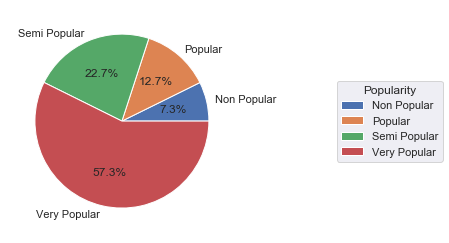

In [84]:
pie_chart()

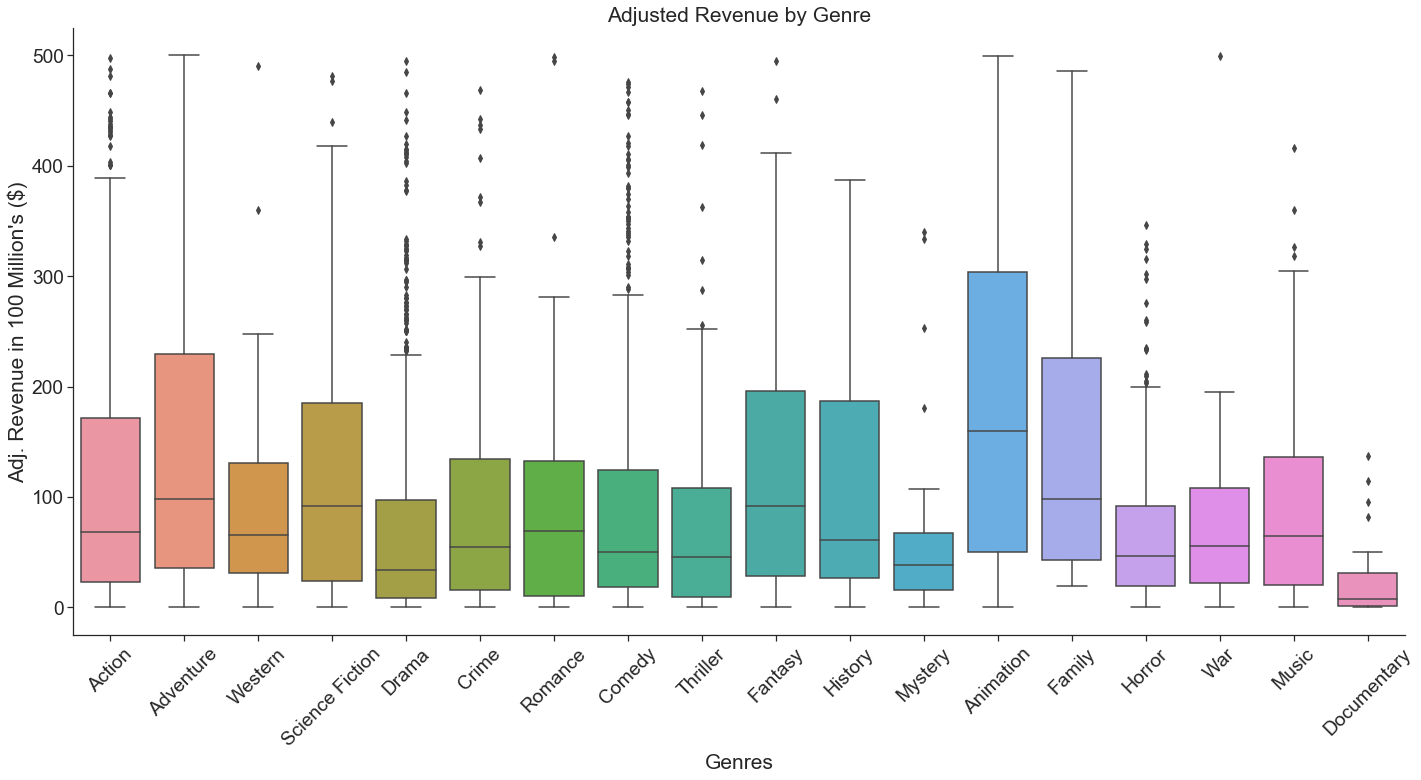

In [85]:
boxplot()

<a id='conclusions'></a>
## Conclusions


> **Pie Chart**: 
* The total revenue divided among the popularity levels shows that more popular movies generate higher revenues. This is most likely because the popularity of a movie generates more "hype" which can create interest with more people willing to see a movie. 
* According to the TMDb website, the popularity rating is based on:
     Number of votes for the day
     Number of views for the day
     Number of users who marked it as a "favourite" for the day
     Number of users who added it to their "watchlist" for the day
     Release date
     Number of total votes
     Previous days score
* Therefore any correlation between revenue and popularity is independent of one another and does not directly contribute to the score. 

> **Box Plot**:
* The boxplot shows that Animation has the overall highest sales of revenue between all the genres. 
* The median is significantly higher than the others which would indicate more data points in higher grossing revenue range. 
* Documentary had the lowest revenues along with Mystery.


<a id='limitations'></a>
## Limitations

* There was a substantial amount of movie data excluded based on missing data values in the budget and revenue columns. 
* Certain movies had multiple genres listed under them but only the first one listed was used in this analysis. 
* The sample size for certain genres was limited which might affect the results. 
